## **Project Goal: Predicting whether a patient is likely to be a readmit to the hospital within 30 days using the dataset for diabetic patients at a hospital.**

# **I loaded the necessary packages and the dataset:**

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [407]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv")
df_1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


# **Decsriptive Statistics:**

In [408]:
df_1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [409]:
df_1.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [410]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [411]:
df_1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# **Exploratory Data Analysis (Demographics of Patients):**

# **Viewing Readmitted Patients:**

In [412]:
sns.set(rc={'figure.figsize':(15,8)})

Text(0, 0.5, 'Number of Patients')

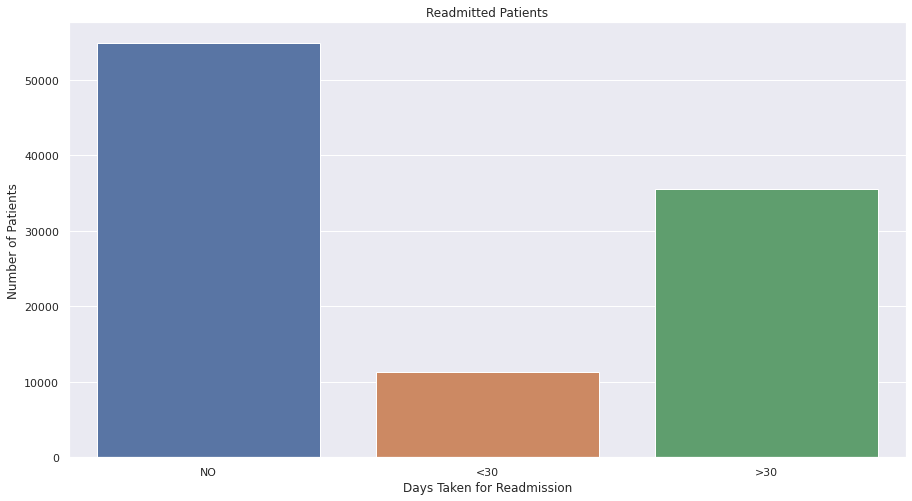

In [413]:
sns.countplot(data=df_1,x=df_1['readmitted'],order=['NO','<30','>30']).set_title('Readmitted Patients')
plt.xlabel('Days Taken for Readmission')
plt.ylabel('Number of Patients')

## **Viewing patients' gender and age:**

In [414]:
sns.set(rc={'figure.figsize':(25,8)})

Text(0.5, 0, 'Age')

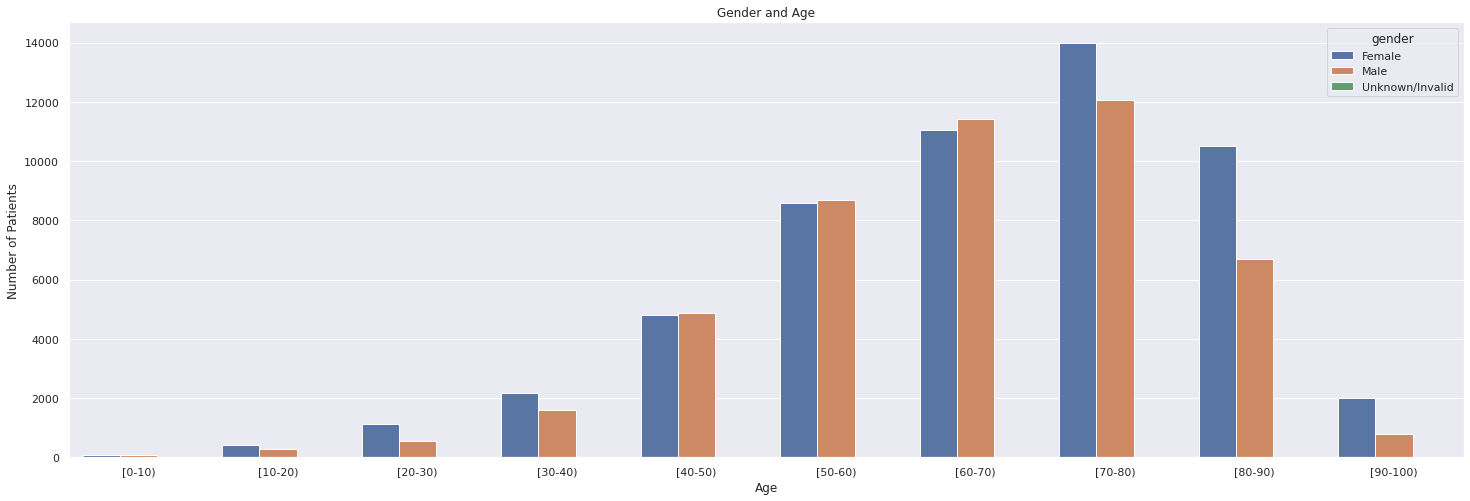

In [415]:
sns.countplot(x='age', hue='gender', data=df_1).set_title('Gender and Age')
plt.ylabel('Number of Patients')
plt.xlabel('Age')

## **Viewing patients' race and age:**

In [416]:
sns.set(rc={'figure.figsize':(25,8)})

Text(0, 0.5, 'Number of Patients')

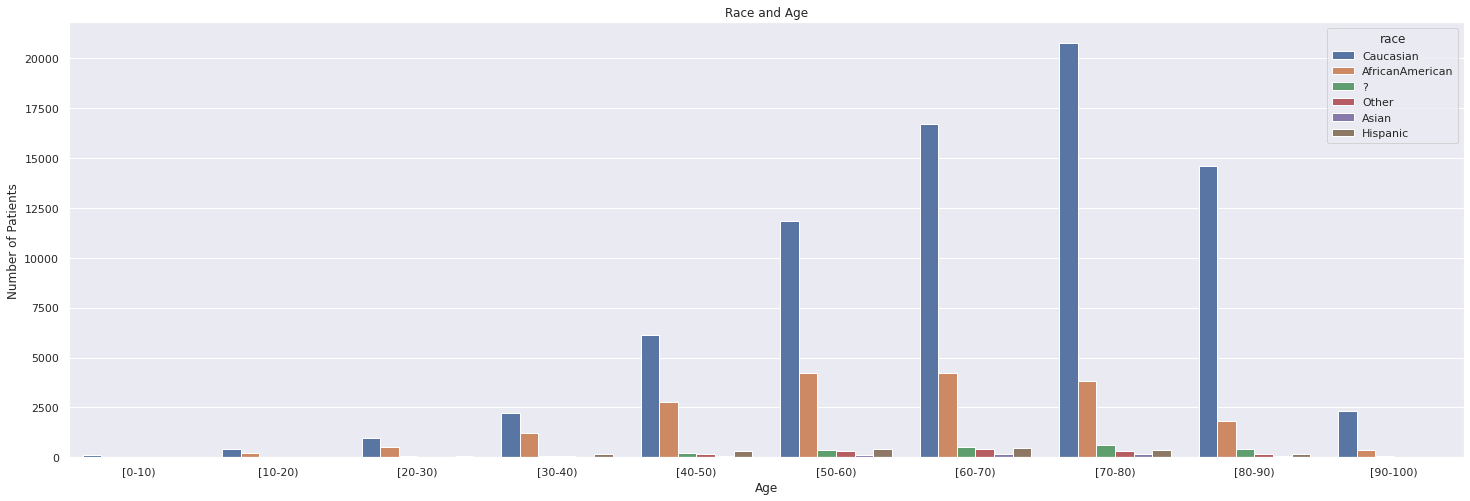

In [417]:
sns.countplot(x='age', hue='race', data=df_1).set_title('Race and Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

## **Removed and adjusted some columns that have "?" values and dropped columns that would not be used in later machine learning models:**

In [418]:
df_1.drop(['encounter_id','weight','payer_code','medical_specialty','patient_nbr','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [419]:
df_1.drop(['admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide'],axis=1,inplace=True)

In [420]:
df_1.drop(['chlorpropamide','acetohexamide', 'tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True)

In [421]:
df_1.drop(['change','number_outpatient', 	'number_emergency', 'number_inpatient'],axis=1,inplace=True)

In [422]:
df_1.drop(['glimepiride', 	'glipizide', 	'glyburide', 	'pioglitazone', 	'rosiglitazone'],axis=1,inplace=True)

In [423]:
df_1['race'].fillna('Other',inplace=True)
df_1.replace({'race': {'?': 'Other'}}, regex=False,inplace=True)

# **Adjusted 'change' column:**

# **Assigned numeric values to certain columns to clean the data up more and make the machine learning section easier:**

In [424]:
df_1.replace({'Caucasian': '1'}, regex=True,inplace=True)
df_1.replace({'AfricanAmerican': '2'}, regex=True,inplace=True)
df_1.replace({'Asian': '3'}, regex=True,inplace=True)
df_1.replace({'Hispanic': '4'}, regex=True,inplace=True)
df_1.replace({'Other': '5'}, regex=True,inplace=True)

In [425]:
df_1.replace({'\[0-10\)': '0'}, regex=True,inplace=True)
df_1.replace({'\[10-20\)': '1'}, regex=True,inplace=True)
df_1.replace({'\[20-30\)': '2'}, regex=True,inplace=True)
df_1.replace({'\[30-40\)': '3'}, regex=True,inplace=True)
df_1.replace({'\[40-50\)': '4'}, regex=True,inplace=True)
df_1.replace({'\[50-60\)': '5'}, regex=True,inplace=True)
df_1.replace({'\[60-70\)': '6'}, regex=True,inplace=True)
df_1.replace({'\[70-80\)': '7'}, regex=True,inplace=True)
df_1.replace({'\[80-90\)': '8'}, regex=True,inplace=True)
df_1.replace({'\[90-100\)': '9'}, regex=True,inplace=True)

In [426]:
df_1.replace({'NO': '0'}, regex=True,inplace=True)
df_1.replace({'<30': '1'}, regex=True,inplace=True)
df_1.replace({'>30': '2'}, regex=True,inplace=True)

In [427]:
df_1['insulin'].replace({'No': '0'}, regex=True,inplace=True)
df_1['insulin'].replace({'Steady': '0'}, regex=True,inplace=True)
df_1['insulin'].replace({'Down': '1'}, regex=True,inplace=True)
df_1['insulin'].replace({'Up': '1'}, regex=True,inplace=True)

In [428]:
diabmed = pd.get_dummies(df_1['diabetesMed'], drop_first=True)
df_1 = pd.concat([df_1,diabmed ],axis=1)
df_1.drop('diabetesMed',axis=1,inplace=True)
df_1.rename(columns={'Yes':'Diabetes Med'},inplace=True)

In [429]:
sex = pd.get_dummies(df_1['gender'], drop_first=True)
df_1 = pd.concat([df_1,sex ],axis=1)
df_1.drop('gender',axis=1,inplace=True)
df_1.drop('race',axis=1,inplace=True)

In [430]:
df_1

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,insulin,readmitted,Diabetes Med,Male,Unknown/Invalid
0,0,1,41,0,1,1,0,0,0,0,0
1,1,3,59,0,18,9,1,2,1,0,0
2,2,2,11,5,13,6,0,0,1,0,0
3,3,2,44,1,16,7,1,0,1,1,0
4,4,1,51,0,8,5,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,7,3,51,0,16,9,1,2,1,1,0
101762,8,5,33,3,18,9,0,0,1,0,0
101763,7,1,53,0,9,13,1,0,1,1,0
101764,8,10,45,2,21,9,1,0,1,0,0


In [431]:
for column in df_1:
  pd.to_numeric(df_1[column])
  print (df_1[column].dtype)

object
int64
int64
int64
int64
int64
object
object
uint8
uint8
uint8


# **I loaded in more packages for machine learning and logistic regression:**

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

%matplotlib inline

In [433]:
ds = df_1

In [440]:
y= ds['readmitted']
X= ds['age']

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [436]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Confusion Matrix:**

In [445]:
print(confusion_matrix(y_test, predict))

[[9261 7303    0]
 [1728 1661    0]
 [5620 4957    0]]


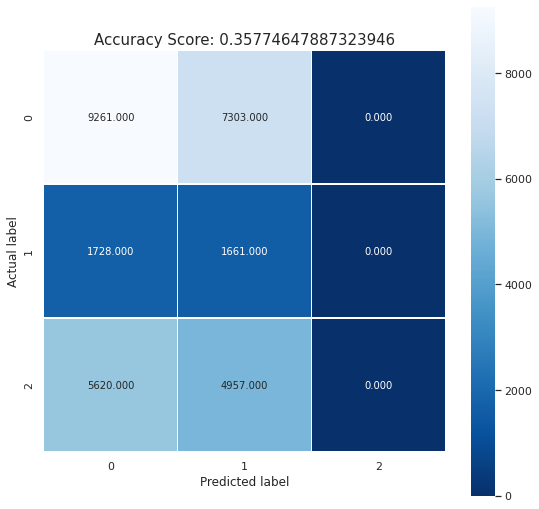

In [444]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

# **Log model:**

In [442]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train, y_train)
logpredict = logmodel.predict(X_test)

In [457]:
print(classification_report(y_test,logpredict))
print('\n')
print(confusion_matrix(y_test, logpredict))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.56      0.56     16564
           1       0.12      0.49      0.19      3389
           2       0.00      0.00      0.00     10577

    accuracy                           0.36     30530
   macro avg       0.23      0.35      0.25     30530
weighted avg       0.32      0.36      0.32     30530



[[9261 7303    0]
 [1728 1661    0]
 [5620 4957    0]]


In [454]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.56      0.56     16564
           1       0.12      0.49      0.19      3389
           2       0.00      0.00      0.00     10577

    accuracy                           0.36     30530
   macro avg       0.23      0.35      0.25     30530
weighted avg       0.32      0.36      0.32     30530



[[9261 7303    0]
 [1728 1661    0]
 [5620 4957    0]]


# **Conclusion:**
The prediction model using logistic regression is not very precise, at around a 30% accuracy rate. This means that it is difficult to predict the readmission of a patient within 30 days. I decided not to use the race and gender parameters in the result as they do not correlate to readmission rate. I only used age as a correlation parameter. 
The accuracy rate found in the logistic regression model was also very similar to the accuracy score generated by the confusion matrix model. Readmission can be predicted, but it will most likely not be reliable. These figures should only be used as a guideline showing that there is a possibility of readmission, rather than a solid answer of "yes" or "no" to the question of readmission. 